# EAM ZrCu system

In this notebook, we will calculate the free energy of a binary ZrCu system. The first system that will be considered is ZrCu with a B2 structure, followed by $\mathrm{Zr}_2\mathrm{Cu}$ with $C11_b$ structure. The potential that will be used is-

[M.I. Mendelev , M.J. Kramer , R.T. Ott , D.J. Sordelet , D. Yagodin & P. Popel (2009) Development of suitable interatomic potentials for simulation of liquid and amorphous Cu–Zr alloys, Philosophical Magazine, 89:11, 967-987](http://dx.doi.org/10.1080/14786430902832773)

To compare our results, we will use the data from this publication:

[Tang, C, and Peter Harrowell. “Predicting the Solid State Phase Diagram for Glass-Forming Alloys of Copper and Zirconium.” Journal of Physics: Condensed Matter 24, no. 24 (June 20, 2012): 245102.](https://doi.org/10.1088/0953-8984/24/24/245102)

The input file for the ZrCu system is in the folder of the same name. The input file is shown below:

```
element: ['Zr', 'Cu']
mass: [91.224, 63.546]
calculations:
- mode: ts 
  temperature: [300, 900]
  pressure: [0]
  lattice: [/home/users/menonsqr/Repos/pytint/examples/ZrCu_EAM/ZrCu/ZrCu.data]
  state: [solid]
  nsims: 1

md:
  pair_style: eam/fs
  pair_coeff: "* * /home/users/menonsqr/Repos/pytint/examples/ZrCu_EAM/ZrCu.eam.fs Zr Cu"
  timestep: 0.001
  tdamp: 0.1
  pdamp: 0.1
  te: 25000
  ts: 50000
  
queue:
  scheduler: local
  cores: 28
  commands:
    - source ~/.zghrc
    - conda activate py3
```

It is very similar to a single species system apart from the two elements listed along with their mass. For multi-component systems, the `lattice` command will only take a LAMMPS data file as input. The atom types in the data file, in the `pair_coeff` command and in the `element` command **should be in the same order**. Once again, the calculations can be submitted from the terminal using,

```
tint -i input.yaml
```

After the calculation is over, we can compare the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The reference data from the publication listed above is provided in a data file.

In [2]:
temp, zrcu, zr2cu = np.loadtxt("fe-zrcu.data", unpack=True)

The variation of free energy with temperature is read in for the ZrCu system.

In [3]:
st1, sfe1, sferr1 = np.loadtxt("ZrCu/ts-ZrCu.data-300-0/temperature_sweep.dat", unpack=True)


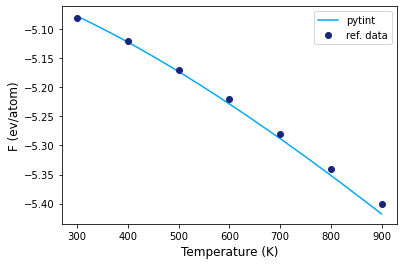

In [4]:
plt.plot(st1, sfe1, color="#03A9F4", label="pytint")
plt.plot(temp, zrcu, 'o', color="#1A237E", label="ref. data")
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()

In [5]:
arg = np.argsort(np.abs(st1-800))[0]
sfe1[arg]

-5.351306265778339

The agreement is excellent. Now the free energy for the $\mathrm{Zr}_2\mathrm{Cu}$ is shown below.

In [6]:
st2, sfe2, sferr2 = np.loadtxt("Zr2Cu/ts-Zr2Cu.data-300-0/temperature_sweep.dat", unpack=True)


In [7]:
plt.plot(st, sfe, color="#03A9F4", label="pytint")
plt.plot(temp, zr2cu, 'o', color="#1A237E", label="ref. data")
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()

NameError: name 'st' is not defined

In [8]:
from pychromatic import Multiplot
from pychromatic.colors import accent

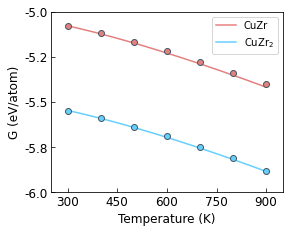

In [10]:
mlt = Multiplot(width=300, ratio=0.8)

mlt[0,0].plot(st1, sfe1, color=accent["pred"], label="CuZr")
mlt[0,0].plot(temp, zrcu, 'o',
        color=accent["pred"], markeredgecolor=accent["lgrey"])

mlt[0,0].plot(st2, sfe2, color=accent["pblue"], label=r"$\mathrm{CuZr}_2$")
mlt[0,0].plot(temp, zr2cu, 'o',
        color=accent["pblue"], markeredgecolor=accent["lgrey"])

mlt[0,0].set_xlim(250, 950)
#mlt[0,1].set_xlim(250, 950)
ticks = np.linspace(300, 900, 5)
mlt[0,0].set_xticks(ticks)
#mlt[0,1].set_xticks(ticks)
mlt[0,0].set_xticklabels(["%d"%x for x in ticks], fontsize=12)
#mlt[0,1].set_xticklabels(["%d"%x for x in ticks], fontsize=12)

mlt[0,0].set_ylim(-6, -5)
#mlt[0,1].set_ylim(-6, -5.5)
ticks = np.linspace(-6, -5, 5)
mlt[0,0].set_yticks(ticks)
mlt[0,0].set_yticklabels(["%.1f"%x for x in ticks], fontsize=12)

#ticks = np.linspace(-6, -5.5, 5)
#mlt[0,1].set_yticks(ticks)
#mlt[0,1].set_yticklabels(["%.1f"%x for x in ticks], fontsize=12)
mlt[0,0].legend()
mlt[0,0].set_xlabel("Temperature (K)", fontsize=12)
#mlt[0,1].set_xlabel("Temperature (K)", fontsize=12)
mlt[0,0].set_ylabel("G (eV/atom)", fontsize=12)
#mlt[0,1].set_ylabel("G (eV/atom)", fontsize=12)
#mlt[0,0].set_title("(a)", loc="left", fontsize=12)
#mlt[0,1].set_title("(b)", loc="left", fontsize=12)
plt.savefig("cuzr_fe.png", dpi=300, bbox_inches="tight")